## **Problem Statement**

#### Machine Learning Assignment

Find a dataset on the internet with a mixture of categorical and numerical attributes. The dataset should contain at least 8 attributes and a few thousands of data records. Make sure that the data is labelled. Then apply the following tasks over it:

##### Regression:
Apply regression to one of the numerical attributes. Use linear regression, random forests, extra random trees, AdaBoost, XGBoost, and NGBoost for regression tasks and compute the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) for each model. Compare the results of all the algorithms and present your analysis. Use the original dataset (dataset after the categorical attributes are removed, but before PCA is applied) for this task without any pre-processing.

#### Classification:
Apply classification using the labels given on both the original dataset (dataset after the categorical attributes are removed, but before PCA is applied) as well as the pre-processed dataset. Use logistic regression, Naive Bayes, KNN, linear SVM, Kernel SVM, Decision Trees, and Basic neural networks. Compare the Precision, Recall and F1-score of the output produced for all these approaches and present your analysis. Compare the results over the original as well as the pre-processed dataset.

#### Clustering:

Take the original dataset (dataset after the categorical attributes are removed, but before PCA is applied) and apply z-score transformation over it. Using the newly transformed and original datasets, apply K-means (choose appropriate k), EM-Clustering, k-medoids, and Compute SSE, Silhouette, BetaCV, Dunn’s Index and Hubert’s Statistic for each clustering output. Compare the results produced on both datasets. Analyse and assess the quantitative meanings of the output produced.

Prepare a report for your assignment. Explain the flow of transformations you are making to your data, how each algorithm is executed by you with appropriate values of parameters chosen and what knowledge you are extracting by running various algorithms. Make sure you present the results in tabular/pictorial format (whichever is most suitable and appealing for a particular experiment) for each of the above experiments. Submit your code along with the report. The code should be written in Python only. Please submit a jupyter notebook file.

##Data Downloading

In [3]:
# from kaggle - downlaoad dataset
!kaggle datasets download -d bryanb/fifa-player-stats-database

#unzip the dataset which contains data for fifa 17 to 23
!unzip fifa-player-stats-database.zip

Dataset URL: https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database
License(s): CC0-1.0
fifa-player-stats-database.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  fifa-player-stats-database.zip
replace FIFA17_official_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:

# Here we are reading the data using Pandas library
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/FIFA22_official_data.csv')


## Pre-processing

In [5]:
# Importing relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
# Specify columns to clean -
columns_to_strip = ['Value', 'Wage', 'Release Clause', 'Height', 'Weight']


In [7]:
# Function to clean and convert values
def clean_values(column):
    if column.name in ['Value', 'Wage', 'Release Clause']:
        # Remove currency symbols and convert to float
        return column.str.replace('€', '', regex=False) \
                     .str.replace('M', 'e6', regex=False) \
                     .str.replace('K', 'e3', regex=False) \
                     .astype(float)
  # height and weight are given as strings in the dataset
    elif column.name == 'Height':
        # Remove 'cm' and convert to float
        return column.str.replace('cm', '', regex=False).astype(float)
    elif column.name == 'Weight':
        # Remove 'kg' and convert to float
        return column.str.replace('kg', '', regex=False).astype(float)


In [8]:
# Apply the cleaning function to each specified column
for col in columns_to_strip:
    if col in data.columns:
        data[col] = clean_values(data[col])

In [9]:
# Display the cleaned values for verification
print("Cleaned Values:")
print(data[columns_to_strip].head())

Cleaned Values:
         Value      Wage  Release Clause  Height  Weight
0  107500000.0  250000.0     206900000.0   179.0    69.0
1   93000000.0  140000.0     160400000.0   189.0    82.0
2   44500000.0  135000.0      91200000.0   182.0    83.0
3  125500000.0  350000.0     232200000.0   181.0    70.0
4   37000000.0   45000.0      77700000.0   172.0    69.0


In [10]:
# Identify and drop categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

In [11]:
# Drop categorical columns from the DataFrame
data_cleaned = data.drop(columns=categorical_columns)

In [12]:
# Display the attributes leftover after removing ()'object' type) categorical columns
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Age                       16710 non-null  int64  
 2   Overall                   16710 non-null  int64  
 3   Potential                 16710 non-null  int64  
 4   Value                     16710 non-null  float64
 5   Wage                      16710 non-null  float64
 6   Special                   16710 non-null  int64  
 7   International Reputation  16710 non-null  float64
 8   Weak Foot                 16710 non-null  float64
 9   Skill Moves               16710 non-null  float64
 10  Jersey Number             16684 non-null  float64
 11  Height                    16710 non-null  float64
 12  Weight                    16710 non-null  float64
 13  Crossing                  16710 non-null  float64
 14  Finish

In [13]:
# Upon observing the dataset we found numerical values which were used to characterise categorical data
# This code is to show the same
print(pd.unique(data_cleaned['International Reputation']))
print(pd.unique(data_cleaned['Skill Moves']))
print(pd.unique(data_cleaned['Weak Foot']))

[3. 4. 5. 2. 1.]
[4. 3. 5. 2. 1.]
[3. 4. 5. 2. 1.]


In [14]:
# Dropping the catergorical data mentioned above
data_cleaned = data_cleaned.loc[:, data_cleaned.columns.difference([
'International Reputation', 'Weak Foot', 'Skill Moves'], sort=False)]

In [15]:
# Numerical attribute are dropped to avoid overfitting, and increased complexity.
# Besides, these variables have no predictive power
data_cleaned = data_cleaned.loc[:, data_cleaned.columns.difference(['ID', 'Jersey Number'], sort=False)]

In [16]:
# Numerical attribute that has many Nan, is dropped since 'Marking' is ~95% empty and
# we will have to drop rows with NaN values, which will reduce the dataset by a lot.
# Else we will have to fit the NaN values with mean or median, which will bias the dataset
data_cleaned = data_cleaned.loc[:, data_cleaned.columns.difference(['Marking'], sort=False)]

In [17]:
# The following values have been dropped since they don't contribute to the
# overall rating of a player, rather are a product of the rating
# Thus to avoid increasing complexity, we drop these variables
data_cleaned = data_cleaned.loc[:, data_cleaned.columns.difference(['Value', 'Wage', 'Best Overall Rating', 'Release Clause'], sort=False)]

In [18]:
# Extract the target variable for classification beforehand
y_classification = data_cleaned['Overall']

In [19]:
print(y_classification.describe())

count    16710.000000
mean        67.646320
std          6.457695
min         28.000000
25%         63.000000
50%         68.000000
75%         72.000000
max         93.000000
Name: Overall, dtype: float64


In [20]:
# Extract the target variable for regrssion too
target = data_cleaned['Overall']

In [21]:
# Dropping the target variable from the dataset that's going to be used in PCA
data_cleaned = data_cleaned.drop(columns=['Overall'])

In [22]:
# Display the attributes leftover after removing unnecessary columns
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 16710 non-null  int64  
 1   Potential           16710 non-null  int64  
 2   Special             16710 non-null  int64  
 3   Height              16710 non-null  float64
 4   Weight              16710 non-null  float64
 5   Crossing            16710 non-null  float64
 6   Finishing           16710 non-null  float64
 7   HeadingAccuracy     16710 non-null  float64
 8   ShortPassing        16710 non-null  float64
 9   Volleys             16673 non-null  float64
 10  Dribbling           16710 non-null  float64
 11  Curve               16673 non-null  float64
 12  FKAccuracy          16710 non-null  float64
 13  LongPassing         16710 non-null  float64
 14  BallControl         16710 non-null  float64
 15  Acceleration        16710 non-null  float64
 16  Spri

In [23]:
# Ensure all data is numeric, coercing errors to NaN
numerical_data = data_cleaned.apply(pd.to_numeric, errors='coerce')

In [24]:
# Handle missing values if necessary (e.g., fill with mean) - as seen non-null values are not 16710 for all attributes
numerical_data.fillna(data_cleaned.mean(), inplace=True)

In [25]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [26]:
# Apply PCA
pca = PCA(n_components=3)  # Extracting 3 principal components
principal_components = pca.fit_transform(scaled_data)

In [27]:
# Create a DataFrame for the principal components with original column names retained for explained variance
pca_df_3 = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])  # Naming principal components

In [28]:
# Display explained variance ratios alongside principal components for context
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratios:")
for i, var in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {var:.4f}")


Explained Variance Ratios:
Principal Component 1: 0.4952
Principal Component 2: 0.1412
Principal Component 3: 0.0948


In [29]:
# Display the resulting DataFrame with principal components
print("\nPrincipal Components DataFrame with 3 components:")
print(pca_df_3.describe())


Principal Components DataFrame with 3 components:
                PC1           PC2           PC3
count  16710.000000  1.671000e+04  1.671000e+04
mean       0.000000  2.721408e-17  8.589445e-17
std        4.394943  2.346727e+00  1.923069e+00
min      -14.583124 -6.658510e+00 -6.587905e+00
25%       -1.015542 -1.795341e+00 -1.348636e+00
50%        1.003957 -1.946801e-01 -6.721291e-02
75%        2.649857  1.673406e+00  1.311020e+00
max        8.669922  6.581704e+00  7.685867e+00


In [30]:
#Normalise the data points to come with standard devaitions = 1 when there means are already close to 0
pca_df_3 = (pca_df_3 - pca_df_3.mean()) / pca_df_3.std()

In [31]:
# Display the resulting DataFrame with principal components
print("\nPrincipal Components DataFrame with 3 components:")
print(pca_df_3.describe())


Principal Components DataFrame with 3 components:
                PC1           PC2           PC3
count  1.671000e+04  1.671000e+04  1.671000e+04
mean   1.768915e-15  1.870968e-17  7.190471e-16
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -3.318160e+00 -2.837360e+00 -3.425725e+00
25%   -2.310705e-01 -7.650405e-01 -7.012933e-01
50%    2.284345e-01 -8.295815e-02 -3.495085e-02
75%    6.029331e-01  7.130810e-01  6.817331e-01
max    1.972704e+00  2.804631e+00  3.996667e+00


## Regression Analysis

In [32]:
# installing and importing the necessary libraries
!pip install --upgrade ngboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from ngboost import NGBRegressor
from sklearn.linear_model import LogisticRegression  # Note: Logistic Regression is not suitable for continuous target
from sklearn.linear_model import LinearRegression

In [33]:
# Initialising the dependent and the independent variables
X = data_cleaned
y = target

In [34]:
# Check for NaN values
contains_nan = np.isnan(X).any()
# mask = X.isna().any(axis=1)

# Display the result
print("Does X contain NaN values?\n", contains_nan)

Does X contain NaN values?
 Age                   False
Potential             False
Special               False
Height                False
Weight                False
Crossing              False
Finishing             False
HeadingAccuracy       False
ShortPassing          False
Volleys                True
Dribbling             False
Curve                  True
FKAccuracy            False
LongPassing           False
BallControl           False
Acceleration          False
SprintSpeed           False
Agility                True
Reactions             False
Balance                True
ShotPower             False
Jumping                True
Stamina               False
Strength              False
LongShots             False
Aggression            False
Interceptions          True
Positioning            True
Vision                 True
Penalties             False
Composure              True
StandingTackle        False
SlidingTackle          True
GKDiving              False
GKHandling          

In [35]:
# Printing number of rows with NaN values
print("Total Rows with NaN value rows: ", len(X))

Total Rows with NaN value rows:  16710


In [36]:
# Dropping rows with NaN values - since filling the rows with mean/median values would be under pre processing and therefoer no longer remain the original dataset
X = X.dropna()

In [37]:
# Printing number of rows without NaN values
print("Total Rows without NaN value rows: ", len(X))

Total Rows without NaN value rows:  15818


In [38]:
# to remove the value from the y column, for the rows that have been dropped in X
y = y[X.index].reset_index(drop=True)
# since it will be used later
target=target[X.index].reset_index(drop=True)

In [39]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Initialise list of linear regression model
models = {
    # 'Linear Regression': LogisticRegression(),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'XGBoost': XGBRegressor(),
    'NGBoost': NGBRegressor()
}

In [41]:
# Store in a list of results
results = {}

# Train models and evaluate performance
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)

    results[name] = {'RMSE': rmse, 'MAE': mae}

[iter 0] loss=3.2764 val_loss=0.0000 scale=1.0000 norm=5.1104
[iter 100] loss=2.7111 val_loss=0.0000 scale=2.0000 norm=5.3626
[iter 200] loss=2.0816 val_loss=0.0000 scale=2.0000 norm=2.9244
[iter 300] loss=1.7701 val_loss=0.0000 scale=1.0000 norm=1.2525
[iter 400] loss=1.6373 val_loss=0.0000 scale=1.0000 norm=1.1784


In [42]:
# Display error results for each of teh following models
results_df = pd.DataFrame(results).T
print(results_df)

                       RMSE       MAE
Linear Regression  1.767013  1.368468
Random Forest      1.008935  0.679020
Extra Trees        0.879723  0.626128
AdaBoost           2.119641  1.730547
XGBoost            0.949505  0.695465
NGBoost            1.343564  0.998900


<ipython-input-43-9c7386abfd9e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df['RMSE'], y=results_df.index, ax=axes[0], palette='viridis')
<ipython-input-43-9c7386abfd9e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df['MAE'], y=results_df.index, ax=axes[1], palette='viridis')


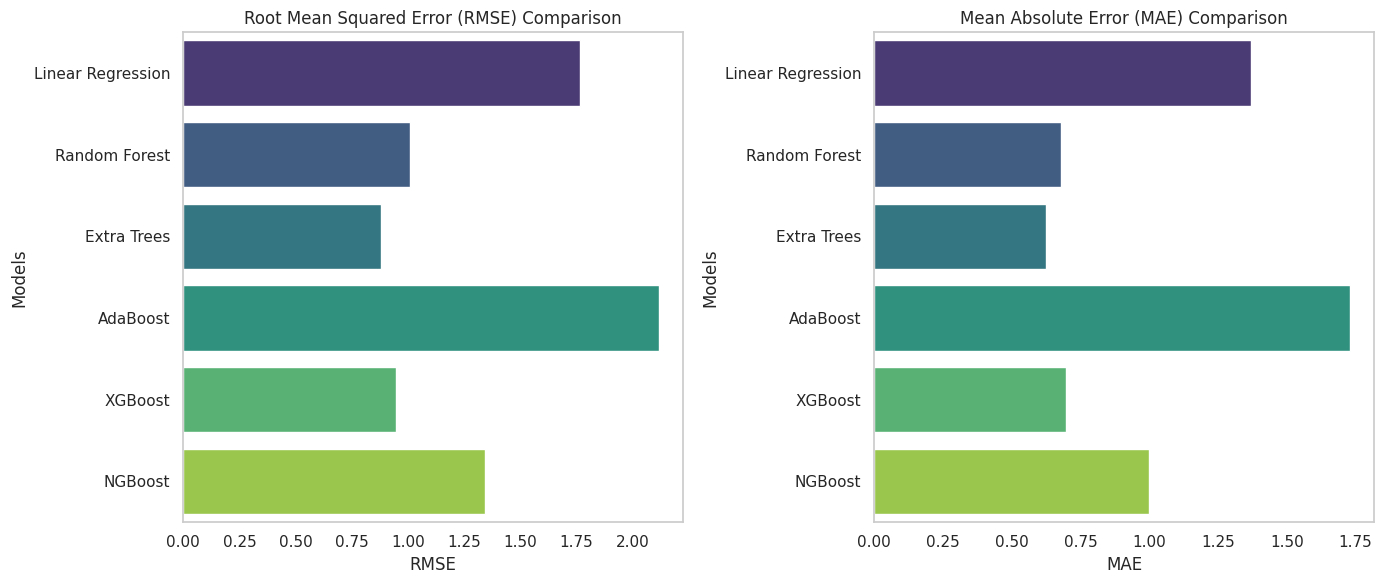

In [43]:
#Importing necessary libraries for plotting the graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Set the colours for the plots
sns.set(style="whitegrid")

# Create a figure with subplots for RMSE and MAE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot RMSE comparitive charts
sns.barplot(x=results_df['RMSE'], y=results_df.index, ax=axes[0], palette='viridis')
axes[0].set_title('Root Mean Squared Error (RMSE) Comparison')
axes[0].set_xlabel('RMSE')
axes[0].set_ylabel('Models')
axes[0].grid(axis='x')

# Plot MAE comparitive charts
sns.barplot(x=results_df['MAE'], y=results_df.index, ax=axes[1], palette='viridis')
axes[1].set_title('Mean Absolute Error (MAE) Comparison')
axes[1].set_xlabel('MAE')
axes[1].set_ylabel('Models')
axes[1].grid(axis='x')

# Adjusting the layout
plt.tight_layout()
plt.show()

##Classification

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [45]:
#We use the feature Overall if it is >=80 or less than 80 as the thing to classify
y = (target>= 80).astype(int)  # Example binary classification target (e.g., Overall rating >= 80)


In [46]:
# Observing the number of players with overall rating > 0
print(y.value_counts())

Overall
0    15282
1      536
Name: count, dtype: int64


In [47]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Scale features for better performance with some classifiers
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [49]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Linear SVM': SVC(kernel='linear'),
    'Kernel SVM': SVC(kernel='rbf'),
    'Decision Tree': DecisionTreeClassifier(),
    'Basic Neural Network': MLPClassifier(max_iter=1000)
}

In [50]:
# Store results
results = {}

# Train models and evaluate performance
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)

    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    results[name] = {'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Display results
results_df = pd.DataFrame(results).T
print("Results on Original Dataset:")
print(results_df)


Results on Original Dataset:
                      Precision    Recall  F1-score
Logistic Regression    0.959184  0.803419  0.874419
Naive Bayes            0.383275  0.940171  0.544554
KNN                    0.918605  0.675214  0.778325
Linear SVM             0.948980  0.794872  0.865116
Kernel SVM             0.961165  0.846154  0.900000
Decision Tree          0.895652  0.880342  0.887931
Basic Neural Network   0.944444  0.871795  0.906667


In [51]:
#Classification on pre-processed data set
y_classification =(y_classification>= 80).astype(int)  # Example binary classification target (e.g., Overall rating >= 80

# Split the scaled numerical data into training and testing sets
X_train_pre, X_test_pre, y_train_pre, y_test_pre = train_test_split(pca_df_3, y_classification, test_size=0.2, random_state=42)

In [52]:
# Observing the number of players with overall rating > 0 for pre-processed data
y_classification.value_counts()

,count
Overall,
0,16116
1,594


In [53]:
# Store results for pre-processed dataset
results_preprocessed = {}

# Train models and evaluate performance on pre-processed dataset
for name, model in models.items():
    model.fit(X_train_pre, y_train_pre)
    predictions_pre = model.predict(X_test_pre)

    precision_pre = precision_score(y_test_pre, predictions_pre)
    recall_pre = recall_score(y_test_pre, predictions_pre)
    f1_pre = f1_score(y_test_pre, predictions_pre)

    results_preprocessed[name] = {'Precision': precision_pre, 'Recall': recall_pre, 'F1-score': f1_pre}

# Display results for pre-processed dataset
results_df_preprocessed = pd.DataFrame(results_preprocessed).T
print("Results on Pre-Processed Dataset:")
print(results_df_preprocessed)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results on Pre-Processed Dataset:
                      Precision    Recall  F1-score
Logistic Regression    0.730769  0.147287  0.245161
Naive Bayes            1.000000  0.031008  0.060150
KNN                    0.762887  0.573643  0.654867
Linear SVM             0.000000  0.000000  0.000000
Kernel SVM             0.833333  0.542636  0.657277
Decision Tree          0.664062  0.658915  0.661479
Basic Neural Network   0.787037  0.658915  0.717300


## Clustering


In [54]:
# Dataframes that we will be using in clsutering, adapted from above
df_transformed = X.copy()
df_non_transformed = X.copy()

In [55]:
# We are going to do clustering analysis of Physical and Technical Attributes
physical_columns = ['Acceleration', 'SprintSpeed', 'Strength', 'Agility', 'Balance', 'Jumping', 'Stamina']
technical_columns = ['Dribbling', 'BallControl', 'ShortPassing', 'Finishing', 'Crossing', 'LongShots']

In [56]:
# Before doing any pre-processing, we'll check for any missing values etc
df_transformed[physical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 15818 entries, 0 to 16708
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Acceleration  15818 non-null  float64
 1   SprintSpeed   15818 non-null  float64
 2   Strength      15818 non-null  float64
 3   Agility       15818 non-null  float64
 4   Balance       15818 non-null  float64
 5   Jumping       15818 non-null  float64
 6   Stamina       15818 non-null  float64
dtypes: float64(7)
memory usage: 988.6 KB


In [57]:
df_transformed[technical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 15818 entries, 0 to 16708
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Dribbling     15818 non-null  float64
 1   BallControl   15818 non-null  float64
 2   ShortPassing  15818 non-null  float64
 3   Finishing     15818 non-null  float64
 4   Crossing      15818 non-null  float64
 5   LongShots     15818 non-null  float64
dtypes: float64(6)
memory usage: 865.0 KB


In [58]:
# We can see that we have handled the missing data
# We have to now apply the Z-scale transformation on the df_transformed

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_transformed[physical_columns] = scaler.fit_transform(df_transformed[physical_columns])
df_transformed[technical_columns] = scaler.fit_transform(df_transformed[technical_columns])

In [59]:
# Function for calculating the SSE

import numpy as np
from scipy.spatial.distance import cdist

def calculate_sse(data, labels, cluster_centers):
    distances = np.min(cdist(data, cluster_centers, 'euclidean'), axis=1)
    sse = np.sum(distances ** 2)
    return sse

In [60]:
# Function for calculating BetaCV
from scipy.spatial.distance import pdist
def calculate_betacv(data, labels):
    unique_labels = np.unique(labels)
    intra_distances = []
    inter_distances = []

    # Intra-cluster distances
    for label in unique_labels:
        cluster_data = data[labels == label]
        intra_distances.append(np.mean(pdist(cluster_data)))

    # Inter-cluster distances
    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            cluster_i = data[labels == unique_labels[i]]
            cluster_j = data[labels == unique_labels[j]]
            inter_distances.append(np.mean(cdist(cluster_i, cluster_j)))

    return np.mean(intra_distances) / np.mean(inter_distances)

In [61]:
!pip install scikit-learn-extra

In [62]:
# Defining dunn index function

def dunn_index(data, labels):
    unique_clusters = np.unique(labels)
    num_clusters = len(unique_clusters)

    # Calculate intra-cluster distances (diameters)
    intra_dists = []
    for cluster in unique_clusters:
        points_in_cluster = data[labels == cluster]
        if len(points_in_cluster) > 1:
            intra_dist = np.max(cdist(points_in_cluster, points_in_cluster))
            intra_dists.append(intra_dist)

    max_intra_dist = max(intra_dists) if intra_dists else 0

    # Calculate inter-cluster distances (minimum distance between clusters)
    min_inter_dist = float('inf')
    for i in range(num_clusters):
        for j in range(i + 1, num_clusters):
            cluster_i_points = data[labels == unique_clusters[i]]
            cluster_j_points = data[labels == unique_clusters[j]]
            inter_dist = np.min(cdist(cluster_i_points, cluster_j_points))
            min_inter_dist = min(min_inter_dist, inter_dist)

    # Compute Dunn's Index
    if max_intra_dist == 0:
        return 0
    dunn_index_value = min_inter_dist / max_intra_dist
    return dunn_index_value


In [63]:
# Hubert's statistic function
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.stats import spearmanr
from sklearn.metrics import pairwise_distances

def huberts_statistic(X, labels):
    """
    Computes Hubert's Gamma Statistic for a dataset and its clustering labels.

    Parameters:
        X (array-like): Dataset (n_samples, n_features).
        labels (array-like): Cluster labels for the dataset.

    Returns:
        float: Hubert's Gamma Statistic value.
    """
    # Compute the distance matrix for the dataset
    dist_matrix = pdist(X, metric='euclidean')  # Pairwise distances
    dist_matrix = squareform(dist_matrix)  # Convert to square form

    # Compute the cluster membership proximity matrix
    label_distances = pairwise_distances(labels.reshape(-1, 1), metric='euclidean')

    # Compute the Spearman rank correlation
    gamma_stat, _ = spearmanr(dist_matrix.ravel(), label_distances.ravel())

    return gamma_stat

In [64]:
# Now we come to the clustering part
# We have to implement these methods: K-means, EM-Clustering, k-medoids
# This is the function which evaluates different clustering algos and stores the results

from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

def apply_clustering_and_evaluate(data, data_name, nClusters):
    evaluation_metrics = {}
    evaluation_labels = {}

    # K-means
    kmeans = KMeans(n_clusters=nClusters, random_state=42)
    kmeans.fit(data)
    kmeans_labels = kmeans.labels_
    kmeans_centers = kmeans.cluster_centers_

    evaluation_labels['kmeans_labels'] = kmeans_labels

    evaluation_metrics['kmeans_sse'] = calculate_sse(data, kmeans_labels, kmeans_centers)
    evaluation_metrics['kmeans_silhouette'] = silhouette_score(data, kmeans_labels)
    evaluation_metrics['kmeans_betacv'] = calculate_betacv(data, kmeans_labels)
    evaluation_metrics['kmeans_dunn'] = dunn_index(data, kmeans_labels)
    # evaluation_metrics['kmeans_huberts'] = huberts_statistic(data, kmeans_labels)

    # K-medoids
    kmedoids = KMedoids(n_clusters=nClusters, random_state=42)
    kmedoids.fit(data)
    kmedoids_labels = kmedoids.labels_
    kmedoids_centers = kmedoids.cluster_centers_

    evaluation_labels['kmedoids_labels'] = kmedoids_labels

    evaluation_metrics['kmedoids_sse'] = calculate_sse(data, kmedoids_labels, kmedoids_centers)
    evaluation_metrics['kmedoids_silhouette'] = silhouette_score(data, kmedoids_labels)
    evaluation_metrics['kmedoids_betacv'] = calculate_betacv(data, kmedoids_labels)
    evaluation_metrics['kmedoids_dunn'] = dunn_index(data, kmedoids_labels)
    # evaluation_metrics['kmedoids_huberts'] = huberts_statistic(data, kmedoids_labels)

    # EM (GMM)
    gmm = GaussianMixture(n_components=nClusters, random_state=42)
    gmm.fit(data)
    gmm_labels = gmm.predict(data)
    gmm_centers = gmm.means_

    evaluation_labels['gmm_labels'] = gmm_labels

    evaluation_metrics['gmm_sse'] = calculate_sse(data, gmm_labels, gmm_centers)
    evaluation_metrics['gmm_silhouette'] = silhouette_score(data, gmm_labels)
    evaluation_metrics['gmm_betacv'] = calculate_betacv(data, gmm_labels)
    evaluation_metrics['gmm_dunn'] = dunn_index(data, gmm_labels)
    # evaluation_metrics['gmm_huberts'] = huberts_statistic(data, gmm_labels)

    print(f"Results for {data_name} dataset:")
    for key, value in evaluation_metrics.items():
        print(f"{key}: {value:.4f}")
    print("----------------------------------------------------")

    return evaluation_metrics, evaluation_labels


In [65]:
# We are applying the clustering algorithms on the data

# Preparing the datasets
data_z = df_transformed[physical_columns + technical_columns].values
data_non_z = df_non_transformed[physical_columns + technical_columns].values

# Applying
print("Applying clustering on Z-Score Transformed Data")
metrics_transformed, labels_transformed = apply_clustering_and_evaluate(data_z, "Z-Transformed",3)

print("\nApplying clustering on Non-Transformed Data")
metrics_non_transformed, labels_non_transformed = apply_clustering_and_evaluate(data_non_z, "Non-Z-Transformed",3)

Applying clustering on Z-Score Transformed Data
Results for Z-Transformed dataset:
kmeans_sse: 94241.1979
kmeans_silhouette: 0.2733
kmeans_betacv: 0.4881
kmeans_dunn: 0.0292
kmedoids_sse: 118024.8961
kmedoids_silhouette: 0.1540
kmedoids_betacv: 0.6579
kmedoids_dunn: 0.0380
gmm_sse: 95017.4322
gmm_silhouette: 0.2351
gmm_betacv: 0.4988
gmm_dunn: 0.0435
----------------------------------------------------

Applying clustering on Non-Transformed Data
Results for Non-Z-Transformed dataset:
kmeans_sse: 21319152.1136
kmeans_silhouette: 0.2969
kmeans_betacv: 0.4606
kmeans_dunn: 0.0546
kmedoids_sse: 27472731.0000
kmedoids_silhouette: 0.1572
kmedoids_betacv: 0.6369
kmedoids_dunn: 0.0417
gmm_sse: 21540316.2683
gmm_silhouette: 0.2551
gmm_betacv: 0.4669
gmm_dunn: 0.0432
----------------------------------------------------


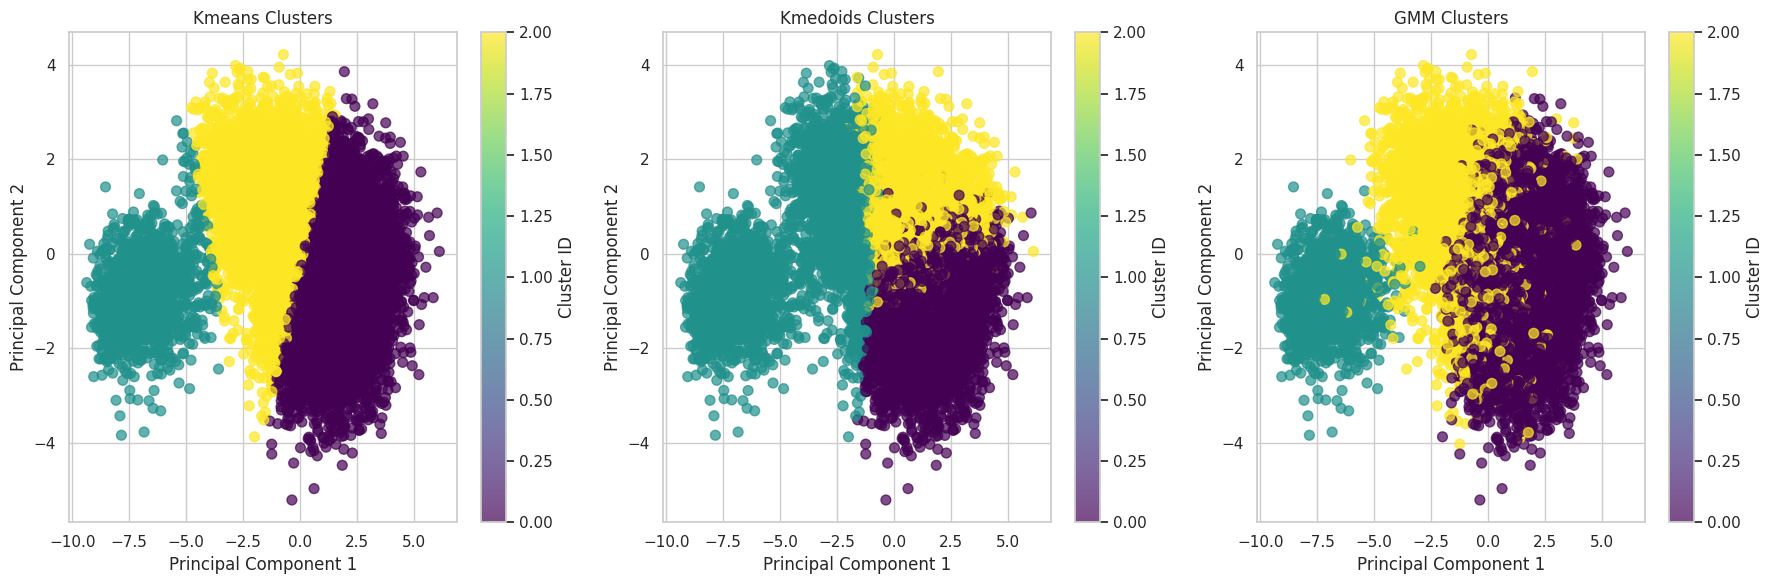

In [66]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def visualize_clusters(data, labels_dict, method_names):
    """
    Visualizes the clusters for different algorithms (K-means, K-medoids, GMM).
    Arguments:
    - data: The dataset to be visualized.
    - labels_dict: Dictionary containing labels from different algorithms.
    - method_names: List of names for each clustering algorithm (e.g., ['K-means', 'K-medoids', 'GMM']).
    """

    # Apply PCA to reduce to 2 dimensions for visualization
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)

    # Create a figure for plotting
    plt.figure(figsize=(18, 6))

    # Iterate over the clustering methods and plot the results
    for idx, method in enumerate(method_names):
        plt.subplot(1, len(method_names), idx+1)  # Creating subplot for each method

        # Get the labels from the dictionary for the current method
        labels = labels_dict[f'{method.lower()}_labels']

        # Scatter plot
        plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)

        # Set plot title and axis labels
        plt.title(f'{method} Clusters')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(label='Cluster ID')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Visualizing the transformed data clusters
labels_dict = labels_transformed
method_names = ['Kmeans', 'Kmedoids', 'GMM']

# Call the visualization function
visualize_clusters(df_transformed[physical_columns + technical_columns], labels_dict, method_names)

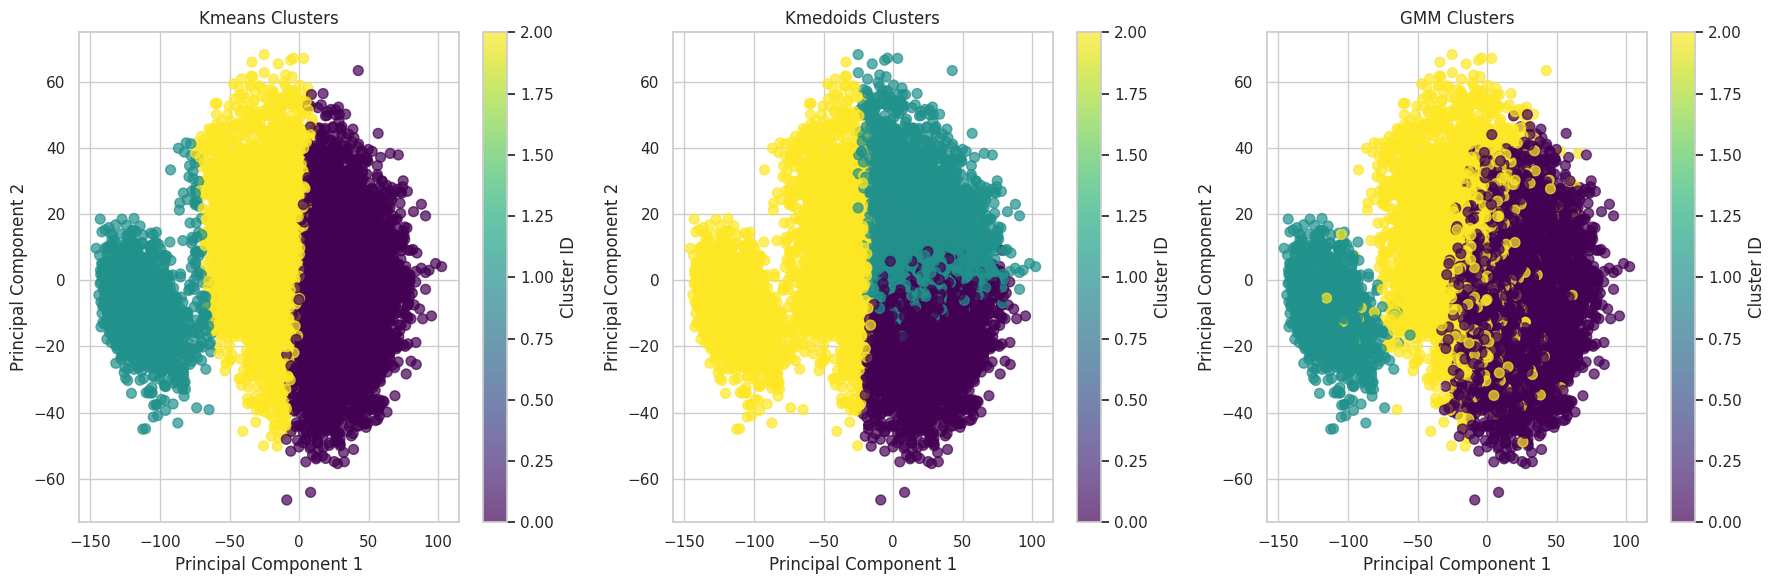

In [67]:
# Visualizing the non_transformed data clusters
labels_dict = labels_non_transformed
method_names = ['Kmeans', 'Kmedoids', 'GMM']

# Call the visualization function
visualize_clusters(df_non_transformed[physical_columns + technical_columns], labels_dict, method_names)

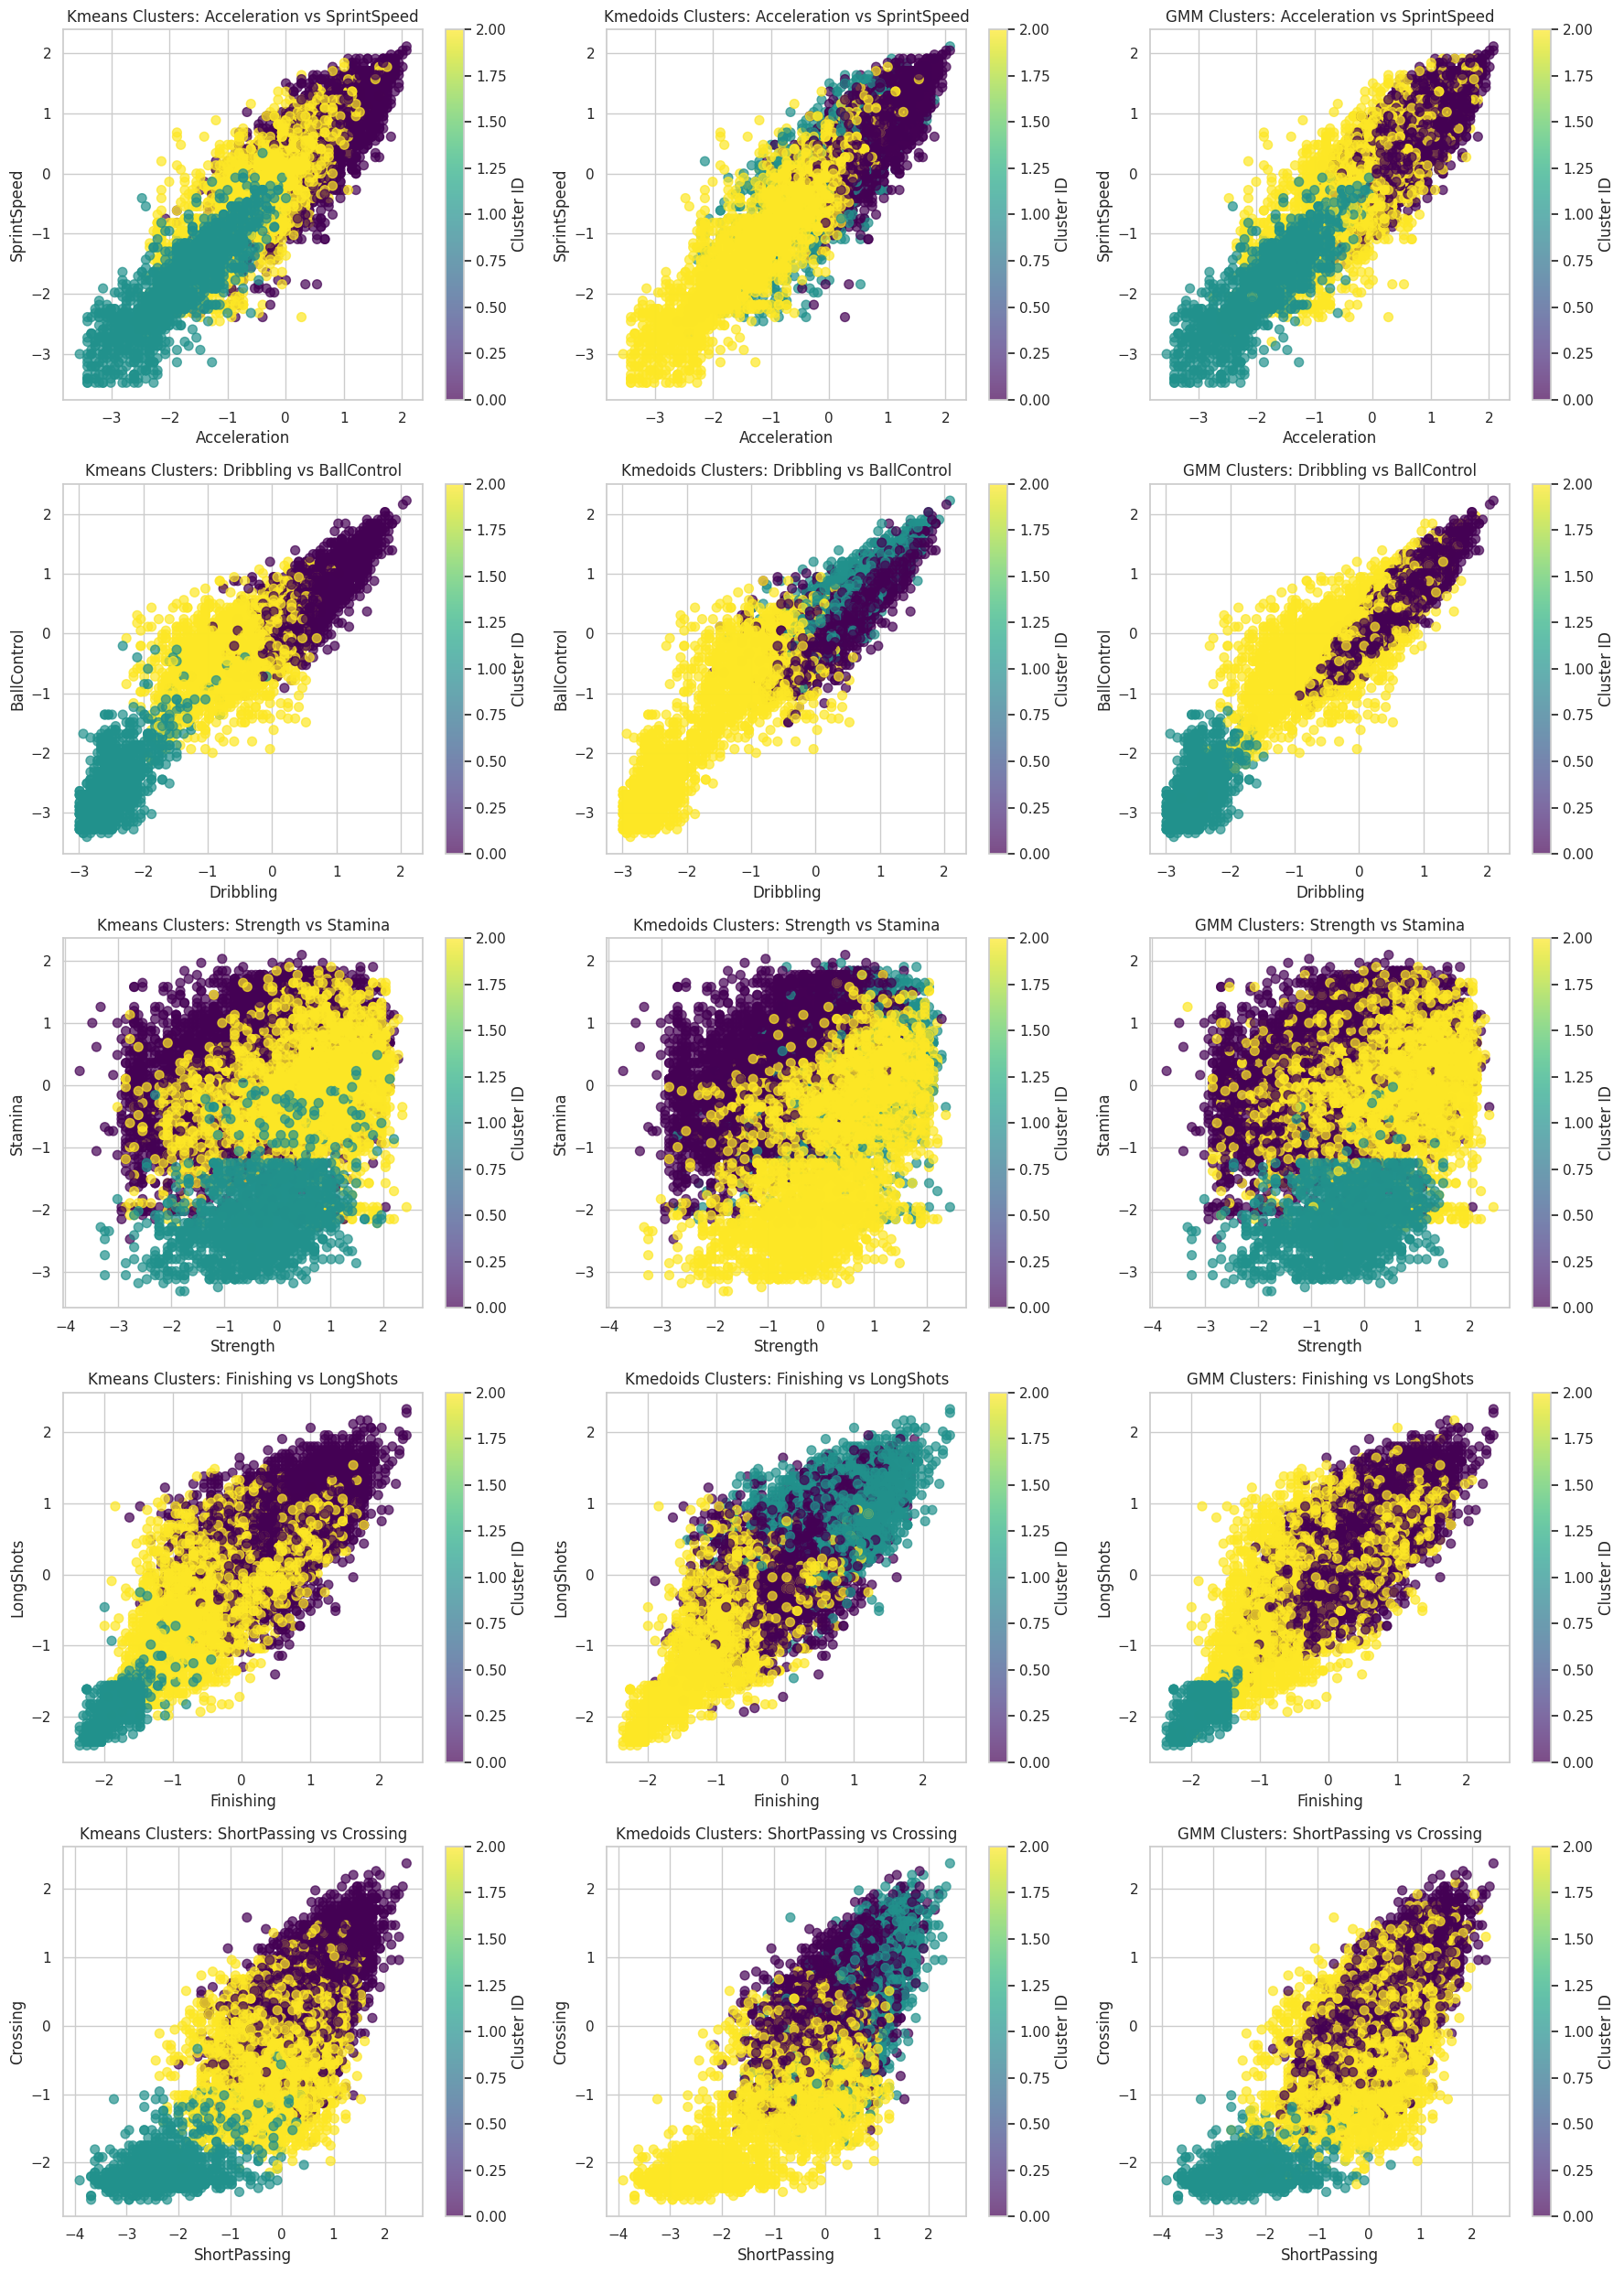

In [68]:
import matplotlib.pyplot as plt

def compare_clusters_with_meaningful_features(data, labels_dict, method_names):
    """
    Compares clusters based on selected meaningful feature pairs.

    Arguments:
    - data: The dataset to be visualized.
    - labels_dict: Dictionary containing labels from different algorithms.
    - method_names: List of names for each clustering algorithm (e.g., ['K-means', 'K-medoids', 'GMM']).
    """

    # Define meaningful feature pairs for analysis
    feature_pairs = [
        ('Acceleration', 'SprintSpeed'),
        ('Dribbling', 'BallControl'),
        ('Strength', 'Stamina'),
        ('Finishing', 'LongShots'),
        ('ShortPassing', 'Crossing')
    ]

    num_features = len(feature_pairs)

    plt.figure(figsize=(18, 5 * num_features))

    # Plot each feature pair for different clustering methods
    for i, (feat1, feat2) in enumerate(feature_pairs):
        for idx, method in enumerate(method_names):
            plt.subplot(num_features, len(method_names), i * len(method_names) + idx + 1)
            labels = labels_dict[f'{method.lower()}_labels']

            # Scatter plot for the current feature pair and method
            plt.scatter(data[feat1], data[feat2], c=labels, cmap='viridis', s=50, alpha=0.7)
            plt.title(f'{method} Clusters: {feat1} vs {feat2}')
            plt.xlabel(feat1)
            plt.ylabel(feat2)
            plt.colorbar(label='Cluster ID')

    plt.tight_layout()
    plt.show()

# Visualizing clusters with selected meaningful feature pairs
method_names = ['Kmeans', 'Kmedoids', 'GMM']
compare_clusters_with_meaningful_features(df_transformed, labels_dict, method_names)


**Interpreting the Clusters:**

For each of these feature pairs, here's what we interpret:

**Acceleration vs Sprint Speed:**

Cluster Interpretation: You might find a cluster with high acceleration but lower sprint speed, possibly indicating players like wingers who make quick, short runs. Another cluster with both high acceleration and sprint speed could indicate fast strikers or fullbacks.

**Dribbling vs Ball Control:**

Cluster Interpretation: A cluster with high dribbling and ball control likely represents highly skilled attackers or midfield playmakers, while a cluster with lower values might indicate defenders or goalkeepers.

**Strength vs Stamina:**

Cluster Interpretation: A cluster with high strength but lower stamina may represent central defenders or physically imposing forwards. Players with high stamina but moderate strength could be midfielders known for covering large distances.

**Finishing vs Long Shots:**

Cluster Interpretation: Players with high finishing and long shots are typically attacking midfielders or versatile forwards. A cluster with high finishing but low long shots could indicate poachers or penalty box strikers.

**Short Passing vs Crossing:**

Cluster Interpretation: A high short passing but low crossing cluster may represent central midfielders or playmakers. Conversely, high crossing but lower short passing may indicate wingers or fullbacks.

In [69]:
# We have worked on the clustering analysis for Physical Vs Technical Attributes till now
# One more potential clustering analysis we can do is on "Goal Keeper Attributes"

# Define goalkeeper columns
goalkeeper_columns = ['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

df_transformed[goalkeeper_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 15818 entries, 0 to 16708
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GKDiving       15818 non-null  float64
 1   GKHandling     15818 non-null  float64
 2   GKKicking      15818 non-null  float64
 3   GKPositioning  15818 non-null  float64
 4   GKReflexes     15818 non-null  float64
dtypes: float64(5)
memory usage: 741.5 KB


In [70]:
# It looks like there's no missing data in the columns of our interest
# This is a relief!
# Now we can do the Z-scaling

# Standardize the data for df_transformed
scaler = StandardScaler()
df_transformed[goalkeeper_columns] = scaler.fit_transform(df_transformed[goalkeeper_columns])

In [71]:
# We have already defined all the required functions for the clustering analysis while we were doing the previous analysis
# Using those functions:

# Prepare the dataset
data_gk_z = df_transformed[goalkeeper_columns].values
data_gk_non_z = df_non_transformed[goalkeeper_columns].values

# Apply clustering and evaluate
print("Applying clustering on Z-Score Transformed Goalkeeper Data")
metrics_gk_transformed, labels_gk_transformed = apply_clustering_and_evaluate(data_gk_z, "GK Z-Transformed",2)

print("\nApplying clustering on Non-Z-Transformed Goalkeeper Data")
metrics_gk_non_transformed, labels_gk_non_transformed = apply_clustering_and_evaluate(data_gk_non_z, "GK Non-Z-Transformed",2)

Applying clustering on Z-Score Transformed Goalkeeper Data
Results for GK Z-Transformed dataset:
kmeans_sse: 3849.4844
kmeans_silhouette: 0.9183
kmeans_betacv: 0.1166
kmeans_dunn: 0.2681
kmedoids_sse: 78997.2245
kmedoids_silhouette: 0.4006
kmedoids_betacv: 0.7335
kmedoids_dunn: 0.0055
gmm_sse: 3850.1221
gmm_silhouette: 0.9176
gmm_betacv: 0.1188
gmm_dunn: 0.0794
----------------------------------------------------

Applying clustering on Non-Z-Transformed Goalkeeper Data
Results for GK Non-Z-Transformed dataset:
kmeans_sse: 1064884.3454
kmeans_silhouette: 0.9184
kmeans_betacv: 0.1164
kmeans_dunn: 0.2750
kmedoids_sse: 21943108.0000
kmedoids_silhouette: 0.3940
kmedoids_betacv: 0.7367
kmedoids_dunn: 0.0057
gmm_sse: 1065061.7464
gmm_silhouette: 0.9178
gmm_betacv: 0.1186
gmm_dunn: 0.0772
----------------------------------------------------


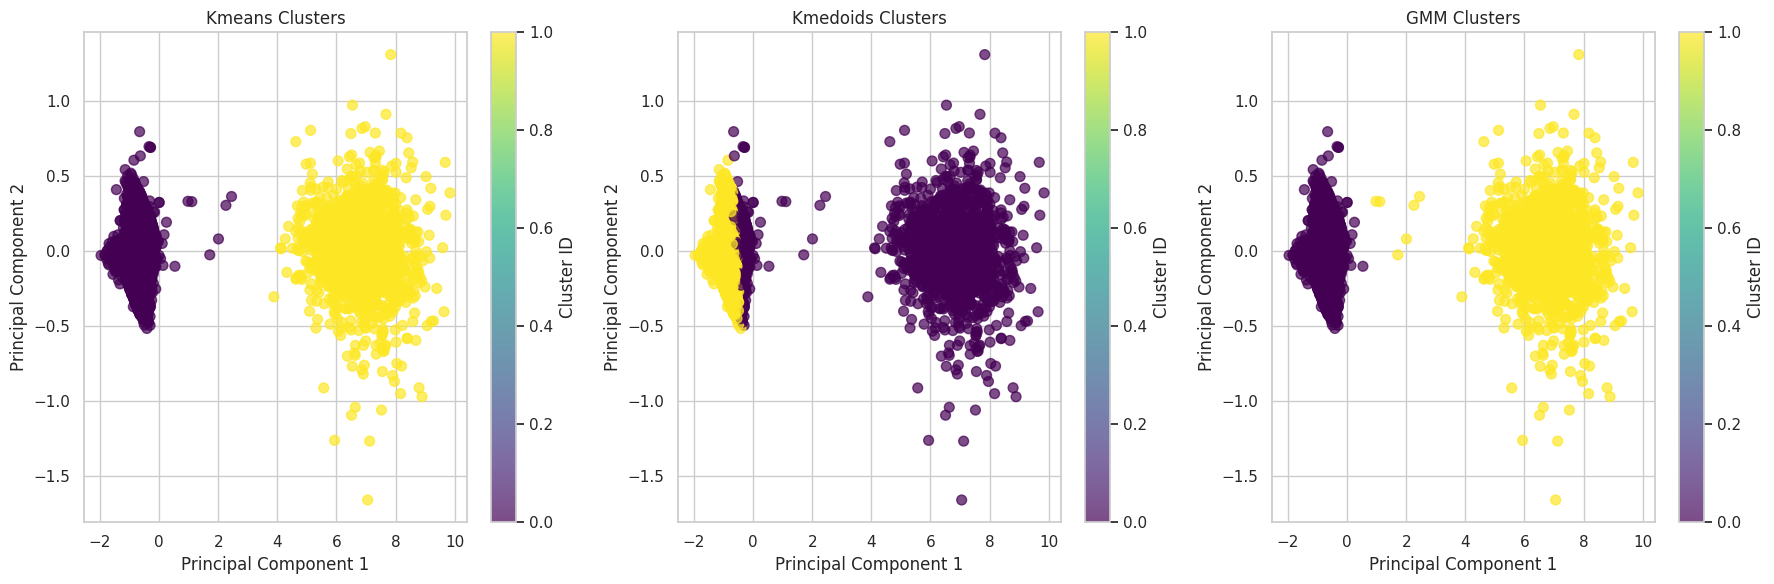

In [72]:
# Visualizing the clustering done:
# Here the visualization is done over all the goal keeper columns. So, we use PCA to reduce dimension and visualize

labels_gk_dict = labels_gk_transformed
method_names_gk = ['Kmeans', 'Kmedoids', 'GMM']

visualize_clusters(df_transformed[goalkeeper_columns], labels_gk_dict, method_names_gk)

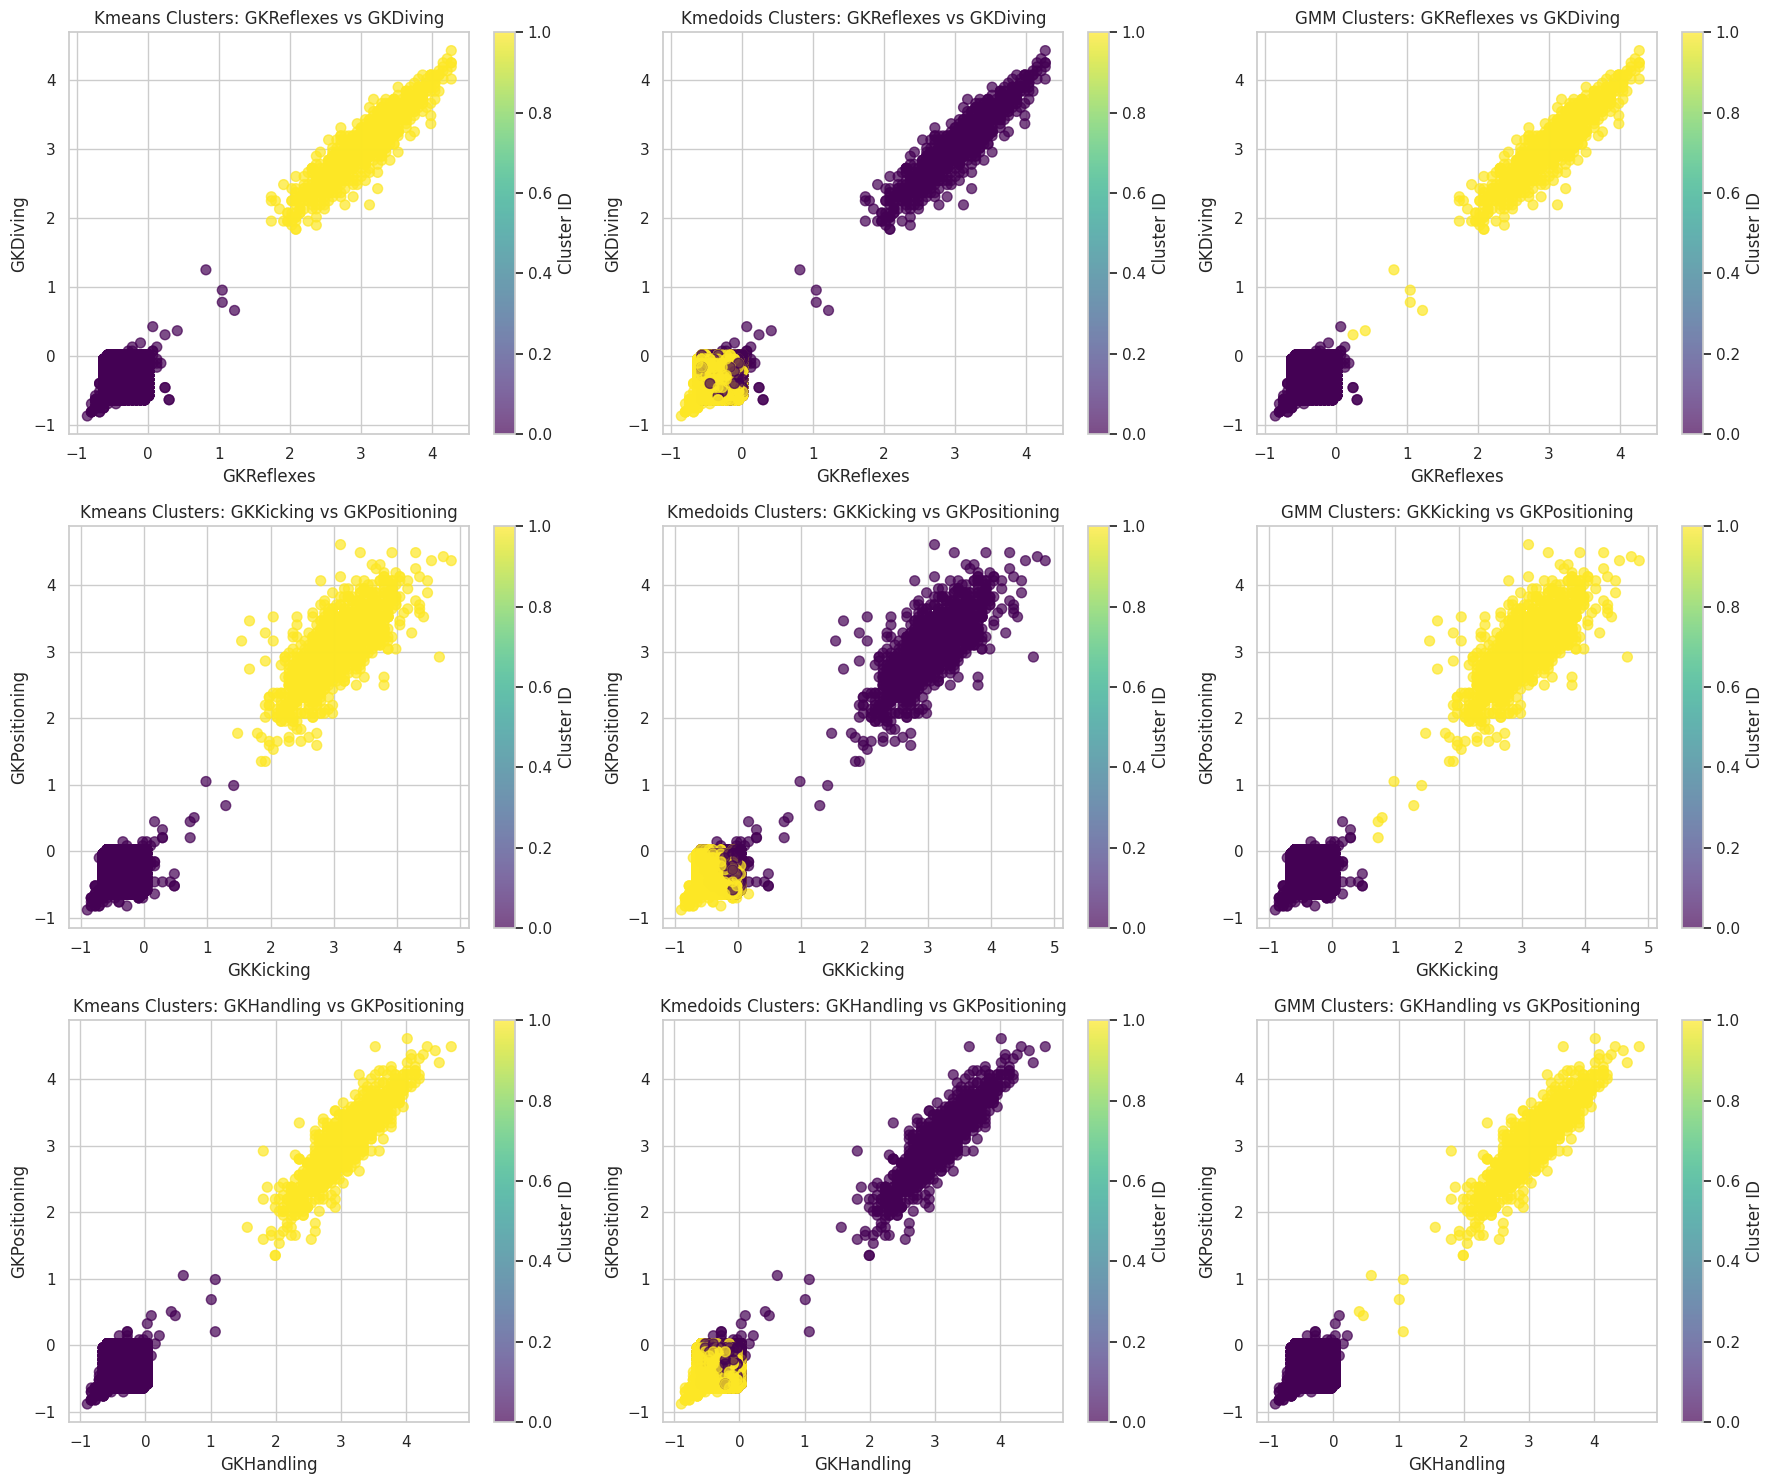

In [73]:
# We can look at the clustering between relavent features for better interpretations
def compare_gk_clusters_with_meaningful_features(data, labels_dict, method_names):
    """
    Compares goalkeeper clusters based on selected meaningful feature pairs.
    """
    feature_pairs = [
        ('GKReflexes', 'GKDiving'),        # Shot-Stoppers
        ('GKKicking', 'GKPositioning'),    # Ball Distributors
        ('GKHandling', 'GKPositioning')    # All-Rounders
    ]

    plt.figure(figsize=(18, 5 * len(feature_pairs)))

    # Plot each feature pair for different clustering methods
    for i, (feat1, feat2) in enumerate(feature_pairs):
        for idx, method in enumerate(method_names):
            plt.subplot(len(feature_pairs), len(method_names), i * len(method_names) + idx + 1)
            labels = labels_dict[f'{method.lower()}_labels']

            plt.scatter(data[feat1], data[feat2], c=labels, cmap='viridis', s=50, alpha=0.7)
            plt.title(f'{method} Clusters: {feat1} vs {feat2}')
            plt.xlabel(feat1)
            plt.ylabel(feat2)
            plt.colorbar(label='Cluster ID')

    plt.tight_layout()
    plt.show()

# Visualize goalkeeper clusters with selected meaningful feature pairs
compare_gk_clusters_with_meaningful_features(df_transformed[goalkeeper_columns], labels_gk_dict, method_names_gk)


**Interpretation**

**Shot-Stoppers:**

Expect to see one cluster with higher values in GKReflexes and GKDiving.
Goalkeepers in this cluster likely excel in saving close-range shots and reacting quickly.

**Ball Distributors:**

One cluster might show higher values in GKKicking and GKPositioning.
These goalkeepers are better at distributing the ball and positioning themselves well, potentially acting as playmakers from the back.

**All-Rounders:**

A cluster with moderate scores across GKHandling, GKPositioning, and other attributes indicates balanced goalkeepers.
These players don't specialize in one area but are reliable in various scenarios.